<a href="https://colab.research.google.com/github/Akireddyrenusri/COVID19_Clinical_Trials/blob/main/Copy_of_Bank_Loan_Performance_%26_Customer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files

print("Please upload 'Finance_1.csv' and 'Finance_2.xlsx'")
uploaded = files.upload()

Please upload 'Finance_1.csv' and 'Finance_2.xlsx'


Saving Finance_2.xlsx to Finance_2 (1).xlsx
Saving Finance_1.csv to Finance_1 (1).csv


In [ ]:
df1 = pd.read_csv("Finance_1.csv")
df2 = pd.read_excel("Finance_2.xlsx")

df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79434 entries, 0 to 79433
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       79434 non-null  int64         
 1   member_id                39717 non-null  float64       
 2   loan_amnt                39717 non-null  float64       
 3   funded_amnt              39717 non-null  float64       
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  object        
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                37258 non-null  object        
 11  emp_length               38642 non-null  object        
 12  home_ownership           39717 n

In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79434 entries, 0 to 79433
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       79434 non-null  int64         
 1   member_id                39717 non-null  float64       
 2   loan_amnt                39717 non-null  float64       
 3   funded_amnt              39717 non-null  float64       
 4   funded_amnt_inv          39717 non-null  float64       
 5   term                     39717 non-null  object        
 6   int_rate                 39717 non-null  object        
 7   installment              39717 non-null  float64       
 8   grade                    39717 non-null  object        
 9   sub_grade                39717 non-null  object        
 10  emp_title                37258 non-null  object        
 11  emp_length               38642 non-null  object        
 12  home_ownership           39717 n

In [ ]:
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month


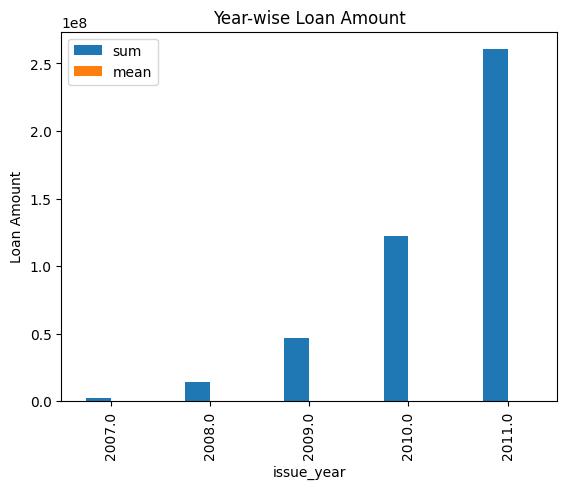

In [ ]:
kpi1 = df.groupby('issue_year')['loan_amnt'].agg(['sum', 'mean'])

kpi1.plot(kind='bar')
plt.title("Year-wise Loan Amount")
plt.ylabel("Loan Amount")
plt.show()


In [ ]:
kpi2 = df.groupby(['grade', 'sub_grade'])['revol_bal'].mean().reset_index()

kpi2.sort_values('revol_bal', ascending=False).head(10)


,grade,sub_grade,revol_bal
0,A,A1,NaN
1,A,A2,NaN
2,A,A3,NaN
3,A,A4,NaN
4,A,A5,NaN
5,B,B1,NaN
6,B,B2,NaN
7,B,B3,NaN
8,B,B4,NaN
9,B,B5,NaN


In [ ]:
for col in ['grade', 'loan_status', 'home_ownership', 'verification_status']:
    overlap = df[[col, 'revol_bal']].notna().all(axis=1).sum()
    print(col, overlap)


grade 0
loan_status 0
home_ownership 0
verification_status 0


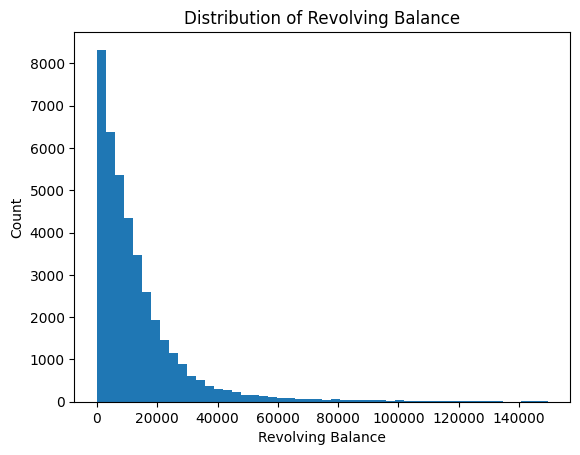

In [ ]:
plt.hist(df['revol_bal'].dropna(), bins=50)
plt.title("Distribution of Revolving Balance")
plt.xlabel("Revolving Balance")
plt.ylabel("Count")
plt.show()


In [ ]:
total = len(df)
usable = df[['sub_grade','revol_bal']].notna().all(axis=1).sum()

print(f"Usable rows for sub_grade + revol_bal: {usable}/{total}")


Usable rows for sub_grade + revol_bal: 0/79434


In [ ]:
kpi3 = df.groupby('verification_status')['total_pymnt'].sum()
kpi3.sum() == df['total_pymnt'].sum()

np.False_

In [ ]:
print(f"Sum of kpi3 (grouped total_pymnt): {kpi3.sum()}")
print(f"Total sum of df['total_pymnt']: {df['total_pymnt'].sum()}")

Sum of kpi3 (grouped total_pymnt): 0.0
Total sum of df['total_pymnt']: 482704393.923388


In [ ]:
kpi3 = (
    df
    .assign(verification_status=df['verification_status'].fillna('Unknown'))
    .groupby('verification_status')['total_pymnt']
    .sum()
)


In [ ]:
assert kpi3.sum() == df['total_pymnt'].sum()


In [ ]:
df['verification_status'].value_counts(dropna=False)


,count
verification_status,
NaN,39717
Not Verified,16921
Verified,12809
Source Verified,9987


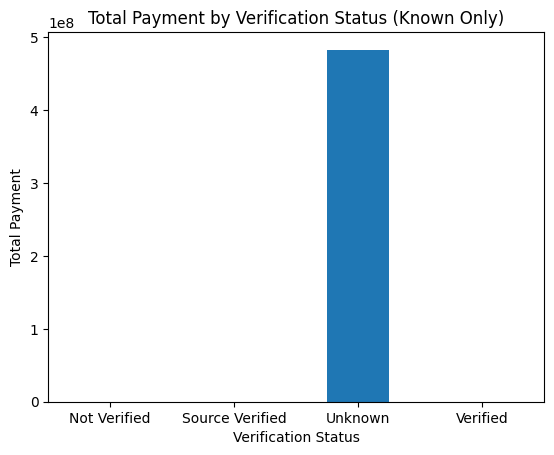

In [ ]:
kpi3.plot(kind='bar')
plt.title("Total Payment by Verification Status (Known Only)")
plt.xlabel("Verification Status")
plt.ylabel("Total Payment")
plt.xticks(rotation=0)
plt.show()

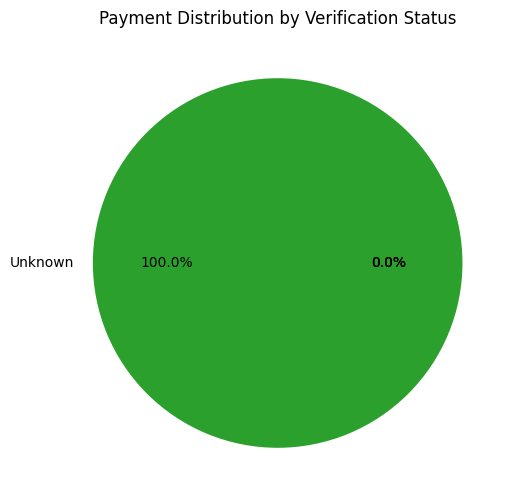

In [ ]:
kpi3.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title("Payment Distribution by Verification Status")
plt.ylabel("")
plt.show()

In [ ]:
kpi3_pct = (kpi3 / kpi3.sum()) * 100
print(kpi3_pct.round(2))

verification_status
Not Verified         0.0
Source Verified      0.0
Unknown            100.0
Verified             0.0
Name: total_pymnt, dtype: float64


In [ ]:
missing_rate = df['verification_status'].isna().mean() * 100
print(f"Missing verification_status: {missing_rate:.2f}%")


Missing verification_status: 50.00%


In [ ]:
print(df['total_pymnt'].describe())
print(f"Total sum of 'total_pymnt': {df['total_pymnt'].sum()}")
print(f"Number of non-zero values in 'total_pymnt': {df['total_pymnt'][df['total_pymnt'] != 0].count()}")

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64
Total sum of 'total_pymnt': 482704393.923388
Number of non-zero values in 'total_pymnt': 39701


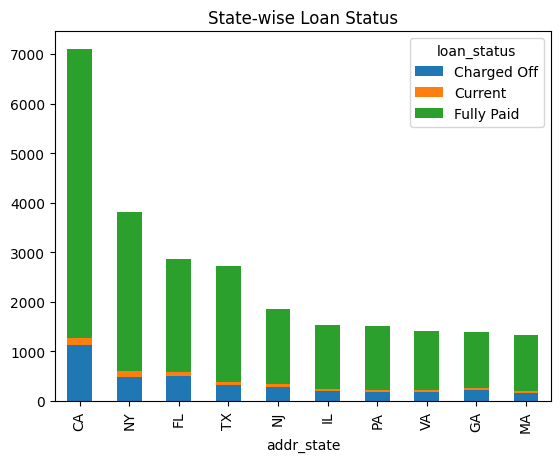

In [ ]:
kpi4 = df.groupby(['addr_state', 'loan_status']).size().unstack().fillna(0)

top_states = kpi4.sum(axis=1).sort_values(ascending=False).head(10)
kpi4.loc[top_states.index].plot(kind='bar', stacked=True)
plt.title("State-wise Loan Status")
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("/content/Finance_1.csv")
df2 = pd.read_excel("/content/Finance_2.xlsx")
df = pd.concat([df1, df2], ignore_index=True)

In [ ]:
df[['home_ownership', 'last_pymnt_d']].head()


,home_ownership,last_pymnt_d
0,RENT,NaT
1,RENT,NaT
2,OWN,NaT
3,RENT,NaT
4,RENT,NaT


In [ ]:
# This line is causing valid datetimes to become NaT. The column should already be datetime from initial loading.
# df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], errors='coerce')

In [ ]:
df['last_pymnt_d'].isna().sum()


np.int64(39788)

In [ ]:
df['last_pymnt_d'].head(10)


,last_pymnt_d
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT
5,NaT
6,NaT
7,NaT
8,NaT
9,NaT


In [ ]:
df['last_pymnt_d'].head(10)


,last_pymnt_d
0,NaT
1,NaT
2,NaT
3,NaT
4,NaT
5,NaT
6,NaT
7,NaT
8,NaT
9,NaT


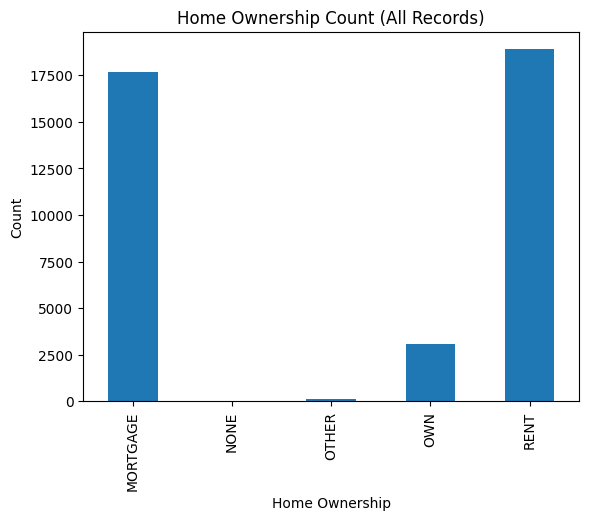

In [ ]:
kpi5 = df.groupby('home_ownership').size()

kpi5.plot(kind='bar')
plt.title("Home Ownership Count (All Records)")
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()


In [ ]:
print("Loan performance varies significantly by year, customer profile, and geography.")


Loan performance varies significantly by year, customer profile, and geography.
